태양광발전량의 증감과 국내 전력시세의 증감을 비교
-> 아직 태양광발전량의 비중 자체가 낮아 전력시세 자체에는 큰 영향을 미치지 않을 것이다.

In [1]:
import pandas as pd

In [2]:
# 일자별 평균 전력시세

df_smp_original = pd.read_csv('전력거래_계통한계가격_시간별_SMP.csv', encoding='cp949')

In [3]:
# 일일 평균값인 가중평균을 사용함

df_smp_day = df_smp_original[['기간', '가중평균']]
df_smp_sort = df_smp_day.sort_index(ascending=False)
df_smp_reset = df_smp_sort.reset_index()
df_smp_drop = df_smp_reset.drop(columns='index')

In [4]:
# 일자별 총 태양광 발전량

prod_orinal = pd.read_csv('태양광_지역별시간별발전량_2021.csv',encoding='cp949')
prod_day = prod_orinal.groupby(['거래일자'])['발전량 '].sum()
df_prod_day = pd.DataFrame(prod_day).reset_index()
df_prod_2 = df_prod_day['발전량 ']
df_prod_final = pd.DataFrame(df_prod_2)

In [5]:
# 두 데이터프레임 합치기

df_concat = pd.concat([df_smp_drop, df_prod_final], axis = 1)

In [6]:
df_concat['연도']=df_concat['기간'].str.split('/').str.get(0)
df_concat['월']=df_concat['기간'].str.split('/').str.get(1)
df_concat['일']=df_concat['기간'].str.split('/').str.get(2)
data=df_concat[['연도','월','일','발전량 ','가중평균']]
data=data.astype(float)
data=data.astype(int)

In [7]:
data_18=data[data['연도']==2018]
data_18=data_18.drop(columns='연도')
data_18_1=data_18.groupby('월')['발전량 '].sum()
data_18_2=data_18.groupby('월')['가중평균'].mean()
data_18=pd.concat([data_18_1,data_18_2],axis=1)
data_18=data_18.rename(columns={'발전량 ':'발전량'})

In [8]:
data_19=data[data['연도']==2019]
data_19=data_19.drop(columns='연도')
data_19_1=data_19.groupby('월')['발전량 '].sum()
data_19_2=data_19.groupby('월')['가중평균'].mean()
data_19=pd.concat([data_19_1,data_19_2],axis=1)
data_19=data_19.rename(columns={'발전량 ':'발전량'})

In [9]:
data_20=data[data['연도']==2020]
data_20=data_20.drop(columns='연도')
data_20_1=data_20.groupby('월')['발전량 '].sum()
data_20_2=data_20.groupby('월')['가중평균'].mean()
data_20=pd.concat([data_20_1,data_20_2],axis=1)
data_20=data_20.rename(columns={'발전량 ':'발전량'})

In [10]:
data_21=data[data['연도']==2021]
data_21=data_21.drop(columns='연도')
data_21_1=data_21.groupby('월')['발전량 '].sum()
data_21_2=data_21.groupby('월')['가중평균'].mean()
data_21=pd.concat([data_21_1,data_21_2],axis=1)
data_21=data_21.rename(columns={'발전량 ':'발전량'})

In [11]:
# seaborn으로 시각화 수행하기

In [12]:
import matplotlib.pyplot as plt

In [14]:
plt.rcParams['font.family'] = 'Malgun Gothic'  
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus']=False

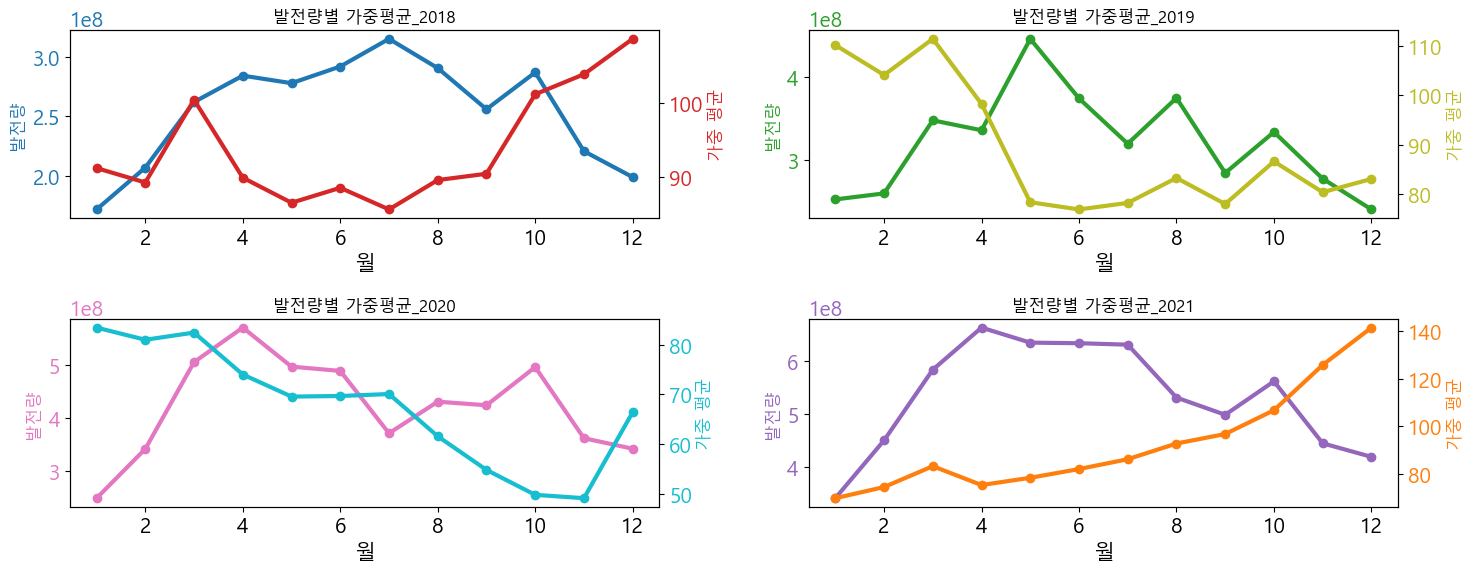

In [15]:
#스케일이 다른 2개 그리기, 스케일이 작은 값의 시각화가 의미가 없기 때문
fig, ax1 = plt.subplots(figsize=(15,6),nrows=2,ncols=2)

color_1 = 'tab:blue'
ax1[0,0].set_title('발전량별 가중평균_2018', fontsize=12)
ax1[0,0].set_xlabel('월')
ax1[0,0].set_ylabel('발전량', fontsize=12, color=color_1)
ax1[0,0].plot(data_18.index, data_18.발전량 , marker='o', color=color_1,linewidth=3)
ax1[0,0].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[0,0].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:red'
ax2.set_ylabel('가중 평균', fontsize=12, color=color_2)
ax2.plot(data_18.index, data_18.가중평균, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)

color_1 = 'tab:green'
ax1[0,1].set_title('발전량별 가중평균_2019', fontsize=12)
ax1[0,1].set_xlabel('월')
ax1[0,1].set_ylabel('발전량', fontsize=12, color=color_1)
ax1[0,1].plot(data_19.index, data_19.발전량 , marker='o', color=color_1,linewidth=3)
ax1[0,1].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[0,1].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:olive'
ax2.set_ylabel('가중 평균', fontsize=12, color=color_2)
ax2.plot(data_19.index, data_19.가중평균, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)

color_1 = 'tab:pink'
ax1[1,0].set_title('발전량별 가중평균_2020', fontsize=12)
ax1[1,0].set_xlabel('월')
ax1[1,0].set_ylabel('발전량', fontsize=12, color=color_1)
ax1[1,0].plot(data_20.index, data_20.발전량 , marker='o', color=color_1,linewidth=3)
ax1[1,0].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[1,0].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:cyan'
ax2.set_ylabel('가중 평균', fontsize=12, color=color_2)
ax2.plot(data_20.index, data_20.가중평균, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)

color_1 = 'tab:purple'
ax1[1,1].set_title('발전량별 가중평균_2021', fontsize=12)
ax1[1,1].set_xlabel('월')
ax1[1,1].set_ylabel('발전량', fontsize=12, color=color_1)
ax1[1,1].plot(data_21.index, data_21.발전량 , marker='o', color=color_1,linewidth=3)
ax1[1,1].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[1,1].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:orange'
ax2.set_ylabel('가중 평균', fontsize=12, color=color_2)
ax2.plot(data_21.index, data_21.가중평균, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)

fig.tight_layout()
plt.show()